# DATA 1 Practical 6 - Questions
                                                                                                    Simos Gerasimou


## From Inferences to Predictions and Back. Where Should We Stop?

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/3.1.1/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

**Scipy Stats API Reference**: https://docs.scipy.org/doc/scipy/reference/stats.html

**t table Reference**:  http://www.ttable.org

**F table Reference**  https://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/tables/FTable.pdf

**Chi-Square table Reference** https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf


In [2]:
#Preamble: Add main Python libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

***

## Inferential Statistics Practical Primer

#### To get started with today's practical, you can go to Lectures 11 and 12 and try to replicate the inferential statistics we saw during the lectures, i.e., independent and paired t test, ANOVA and Chi-Square. This will enable you to understand better how these tests operate under the hood. 

***

### Part A: Yorkshire City Council

DataVision has been commissioned by the York City Council to analyse a set of data regarding citizens of Yorkshire and extract actionable knowledge. 

The dataset for Yorkhire citizens is available on the following link:
* [Yorkshire dataset](https://drive.google.com/file/d/12UiWQOx8qOiAOBrKirnlU6TG6lv2lfHu/view?usp=sharing)


**TA1) Load the Yorkshire dataset using Pandas**

**Note**: You have to download the dataset on your local machine and then load it onto the Jupyter Notebook

In [3]:
#Write your answer here
dataframe = pd.read_csv("yorkshire.csv")
# dataframe.drop(index, axis=1, inplace=True)  # what do you call the index column...
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        330 non-null    object 
 1   age       330 non-null    int64  
 2   gender    330 non-null    object 
 3   region    330 non-null    object 
 4   income    330 non-null    float64
 5   married   330 non-null    object 
 6   children  330 non-null    int64  
 7   car       330 non-null    object 
 8   mortgage  330 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 15.5+ KB


**TA2) Print the first 15 records of the dataframe**

In [4]:
#Write your answer here
dataframe.head(15)

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.600000,YES,2,NO,NO
6,ID12107,22,MALE,RURAL,8877.070000,NO,0,NO,NO
7,ID12108,58,MALE,TOWN,24946.600000,YES,0,YES,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.300000,YES,2,YES,NO
9,ID12110,54,MALE,TOWN,24212.100000,YES,2,YES,NO


**TA3) Get general info about the dataset**

In [5]:
#Write your answer here
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        330 non-null    object 
 1   age       330 non-null    int64  
 2   gender    330 non-null    object 
 3   region    330 non-null    object 
 4   income    330 non-null    float64
 5   married   330 non-null    object 
 6   children  330 non-null    int64  
 7   car       330 non-null    object 
 8   mortgage  330 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 15.5+ KB


**TA4) Explore the dataset and try to understand the meaning of each variable (column). Identify which variables are categorical and which are numerical.**

In [6]:
#Answer
#id:        citizen ID
#age:       citizen age
#gender:    citizen gender (male/female)
#region:    inner city/suburban/town/rural
#income:    amount of income per year
#married:   yes/no (single)
#children:  number of children
#car:       yes/no (does the citizen have a car)
#mortgage:  yes/no (does the citizen have a mortgage)

**TA5) Get the shape of the dataframe**

In [7]:
#Write your answer here
dataframe.shape


(330, 9)

**TA6) Get the columns name of the dataframe. If you think any column renaming is needed, please do it.**

In [8]:
#Write your answer here
dataframe.columns

Index(['id', 'age', 'gender', 'region', 'income', 'married', 'children', 'car',
       'mortgage'],
      dtype='object')

**TA7) Check whether there are any duplicated records?**  

Note: A record is duplicated if all its entries are identical with another record

In [9]:
#Write your answer here
dataframe.duplicated().sum()

0

**TA8) Is there any missing data?**

In [10]:
#Write your answer here
missing_data_summary = dataframe.isnull().sum().sort_values(ascending=False)
missing_data_percentage = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_data_summary, missing_data_percentage], axis=1, keys=["missing", "percentage"])
missing_data
# nice and clean, yay, alhamulillah X')

,missing,percentage
mortgage,0,0.0
car,0,0.0
children,0,0.0
married,0,0.0
income,0,0.0
region,0,0.0
gender,0,0.0
age,0,0.0
id,0,0.0


**TA9) Plot the histogram and density curve of income.**

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


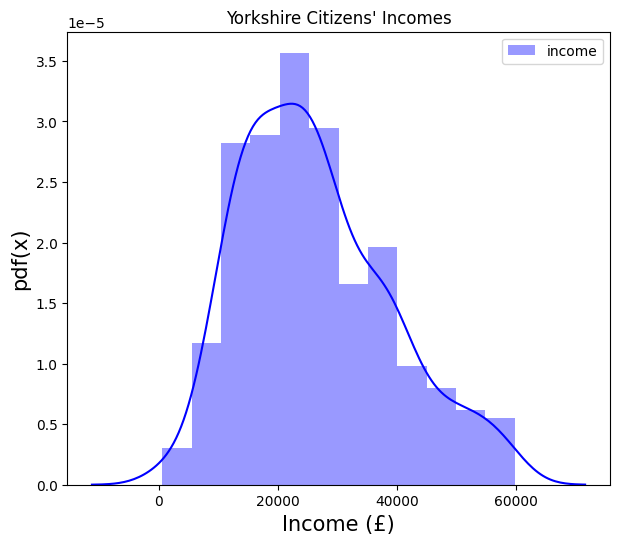

In [11]:
#Write your answer here
plt.subplots(figsize=(7, 6), dpi=100)
ax = sns.distplot(dataframe["income"], color="blue", label="income", hist=True)
plt.title("Yorkshire Citizens' Incomes")
ax.set_xlabel('Income (£)', fontsize=15) # set x label
ax.set_ylabel('pdf(x)', fontsize=15, rotation=90) # set y label
plt.legend()

**TA10) The Council is interested in assessing whether there is any discrimination in annual income between genders**

**(i) State the Null and Alternative hypotheses**

In [12]:
#Write your answer here
# Ho: μ_m = μ_f
# Ha: μ_m != μ_f
# where μ_f is the population mean of female citizen's annual income
# and μ_m is the population mean of male citizen's annual income

**(ii) Calculate the degrees of freedom**

In [13]:
#Write your answer here
dataframe_men = dataframe[dataframe["gender"] == "MALE"]
dataframe_women = dataframe[dataframe["gender"] == "FEMALE"]
d_of_f = len(dataframe_men) + len(dataframe_women) - 2
d_of_f

328

**(iii) Find the critical value for a two-tailed test with significance level α=0.05**

Hint: t table [http://www.ttable.org](http://www.ttable.org)

Hint: Confirm that the value is correct using the appropriate statistical test method from [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)


In [14]:
#Write your answer here
alpha = 0.05
# both positive and negative because two tailed test
negative_critical_value = stats.t.ppf(alpha / 2, d_of_f)
positive_critical_value = stats.t.ppf(1 - (alpha / 2), d_of_f)  # or positive_critical_value = -negative_critical_value
[negative_critical_value, positive_critical_value]

[-1.9672228266462515, 1.967222826646251]

**(iv) Perform the appropriate t test to evaluate the hypotheses for significance level  𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [15]:
#Write your answer here

# two tailedly performing an independent samples t test, woth equal variances assumed

mu_f = np.mean(dataframe_women["income"])
mu_m = np.mean(dataframe_men["income"])
sigma_f = np.std(dataframe_women["income"], ddof=1)
sigma_m = np.std(dataframe_men["income"], ddof=1)

t_value, p_value = stats.ttest_ind(dataframe_women["income"], dataframe_men["income"])

if t_value > negative_critical_value and t_value < positive_critical_value:
    print("t value lies outside of the critical region (boundaried by the critical value(s)), so insufficient evidence to suggest that Ho should be rejected.")
else:
    print("t value lies within the critical region, so sufficient evidence to reject Ho, and thus accept Ha.")


t value lies outside of the critical region (boundaried by the critical value(s)), so insufficient evidence to suggest that Ho should be rejected.


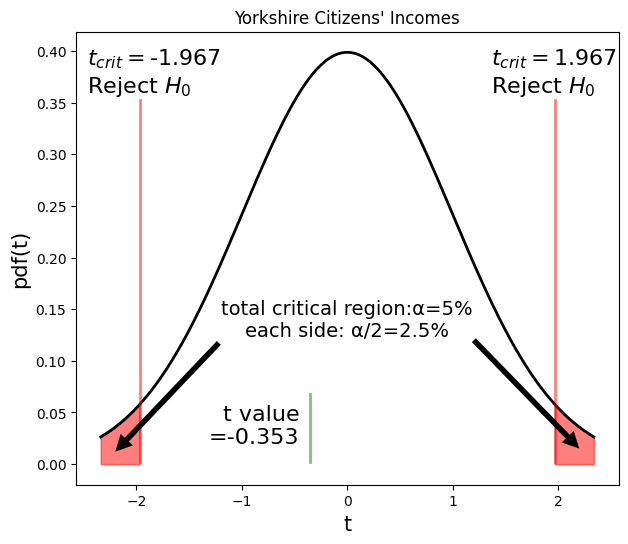

In [16]:
#Additional Visualisation 0m0
x_axis = np.linspace(stats.t.ppf(0.01, d_of_f), stats.t.ppf(0.99, d_of_f), 1000)
y_axis = stats.t.pdf(x_axis, d_of_f)

fig, ax = plt.subplots(figsize=(7,6), dpi=100)
ax = sns.lineplot(y=y_axis, x=x_axis, linestyle='-', color="black", label="A", lw=2)
plt.title("Yorkshire Citizens' Incomes")
ax.set_xlabel('t', fontsize=15) # set x label
ax.set_ylabel('pdf(t)', fontsize=15, rotation=90) # set y label

# t value on graph
ax.axvline(x=t_value, ymin=0.05, ymax=0.2, color='g', alpha=0.5, ls='-', lw=2) # vertical line
ax.text(t_value - 0.1, 0.02,"t value\n={:.3f}".format(t_value), fontsize=16, ha="right")

# negative-side critical region
ax.axvline(x=negative_critical_value, ymin=0.05, ymax=0.85, color='r',alpha=0.5, ls='-', lw=2)
ax.text(negative_critical_value-0.5, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(negative_critical_value), fontsize=16)
px = np.arange(np.min(x_axis), negative_critical_value, 0.01)
ax.fill_between(px, stats.t.pdf(px, d_of_f), alpha=0.5, color='r')

#positive-side critical region
ax.axvline(x=positive_critical_value, ymin=0.05, ymax=0.85, color='r', alpha=0.5, ls='-', lw=2)
ax.text(positive_critical_value - 0.6, 0.36, r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(positive_critical_value), fontsize=16, ha="left")
px = np.arange(positive_critical_value, np.max(x_axis), 0.01)
ax.fill_between(px, stats.t.pdf(px, d_of_f), alpha=0.5, color='r')

#negative side arrow
ax.annotate("total critical region:α=5%\neach side: α/2=2.5%".format(3), xy=(-2.2, 0.012), xytext=(0, 0.12), size=14,  va="bottom", ha="center",
            arrowprops=dict(facecolor='black', lw=3.5, ls='--', ec='None'))

#positive side arrow
ax.annotate("", xy=(2.2, 0.015), xytext=(1.2, 0.12), size=14,  va="bottom", ha="center",
            arrowprops=dict(facecolor='black', lw=3.5, ls='--', ec='None'))


# ax.legend(loc="lower center")
ax.legend().remove()

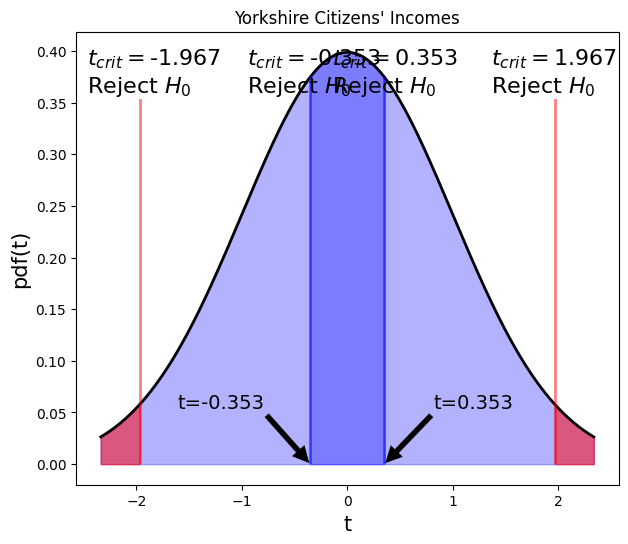

In [17]:
# Additional visualisations ~ copyings really
x_axis = np.linspace(stats.t.ppf(0.01, d_of_f), stats.t.ppf(0.99, d_of_f), 1000)
y_axis = stats.t.pdf(x_axis, d_of_f)

fig, ax = plt.subplots(figsize=(7,6), dpi=100)
ax = sns.lineplot(y=y_axis, x=x_axis, linestyle='-', color="black", label="A", lw=2)
plt.title("Yorkshire Citizens' Incomes")
ax.set_xlabel('t', fontsize=15) # set x label
ax.set_ylabel('pdf(t)', fontsize=15, rotation=90) # set y label

#negative-side p value
ax.axvline(x=-t_value, ymin=0.05, ymax=0.9, color='b',alpha=0.5, ls='-', lw=2)
ax.text(-t_value-0.5, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(-t_value), fontsize=16)
px = np.arange(np.min(x_axis), -t_value, 0.01)  # all values with step 0.01
ax.fill_between(px, stats.t.pdf(px, d_of_f), alpha=0.3, color='b')

#positive-side p value
ax.axvline(x=t_value, ymin=0.05, ymax=0.9, color='b', alpha=0.5, ls='-', lw=2)
ax.text(t_value-0.6, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(t_value), fontsize=16, ha="left")
px = np.arange(t_value, np.max(x_axis), 0.01)
ax.fill_between(px, stats.t.pdf(px, d_of_f), alpha=0.3, color='b')

#negative-side critical region
ax.axvline(x=negative_critical_value, ymin=0.05, ymax=0.85, color='r',alpha=0.5, ls='-', lw=2)
ax.text(negative_critical_value-0.5, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(negative_critical_value), fontsize=16)
px = np.arange(np.min(x_axis), negative_critical_value, 0.01)
ax.fill_between(px, stats.t.pdf(px, d_of_f), alpha=0.5, color='r')

#positive-side critical region
ax.axvline(x=positive_critical_value, ymin=0.05, ymax=0.85, color='r',alpha=0.5, ls='-', lw=2)
ax.text(positive_critical_value-0.6, 0.36,r"$t_{crit}=$"+"{:.3f}\nReject $H_0$".format(positive_critical_value), fontsize=16, ha="left")
px = np.arange(positive_critical_value, np.max(x_axis), 0.01)
ax.fill_between(px, stats.t.pdf(px, d_of_f), alpha=0.5, color='r')

#negative side arrow
ax.annotate("t=-0.353", xy=(-0.36, 0.001), xytext=(-1.2, 0.05), size=14,  va="bottom", ha="center",
            arrowprops=dict(facecolor='black', lw=3.5, ls='--', ec='None'))

#positive side arrow
ax.annotate("t=0.353", xy=(0.36, 0.001), xytext=(1.2, 0.05), size=14,  va="bottom", ha="center",
            arrowprops=dict(facecolor='black', lw=3.5, ls='--', ec='None'))


# ax.legend(loc="lower center")
ax.legend().remove()

**TA11) The Council is interested in assessing whether there is any discrimination in annual income between married and single citizens, and specifically whether married citizens are being paid more**

**(i) State the Null and Alternative hypotheses**

In [18]:
#Write your answer here
# Ho: μm == μs
# Ha: μm > μs

**(ii) Calculate the degrees of freedom**

In [19]:
#Write your answer here
df_married = dataframe[dataframe["married"] == "YES"]
df_single = dataframe[dataframe["married"] == "NO"]
dof = len(df_married) + len(df_single) - 2

**(iii) Find the critical value for a test with significance level α=0.05**

Hint: t table http://www.ttable.org

Hint: Confirm that the value is correct using the appropriate statistical test method from scipy.stats.t

In [20]:
#Write your answer here
critical_value = stats.t.ppf(1 - 0.05, dof)
critical_value

1.6495124933663257

**(iv) Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [21]:
#Write your answer here
x1 = np.mean(df_married["income"])  # income_married_mean
x2 = np.mean(df_single["income"])  # income_single_mean
s1 = np.std(df_married["income"], ddof=1)  # income_married_std
s2 = np.std(df_single["income"], ddof=1)  # income_single_std
n1 = len(df_married["income"])
n2 = len(df_single["income"])

# assuming equal variances
sp = np.sqrt((((n1 - 1)*s1*s1) + ((n2 - 1)*s2*s2)) / (n1 + n2 -2))  # pooled standard deviation
t_value = (x1 - x2) / (sp * np.sqrt((1 / n1) + (1 / n2)))
# ugh cri so fiddly and inaccurate T.T
# huh apparently t value is the same as model answers, but pooled std is not OmO weird, hum

if round(t_value, 5) == round(stats.ttest_ind(df_married["income"], df_single["income"])[0], 5):
    print("approx accurate t value statistic calculated: " + str(t_value))
# t_value, stats.ttest_ind(df_married["income"], df_single["income"])[0]

approx accurate t value statistic calculated: 0.25591405256592475


**(v) Plot the two distributions of income for married and single citizens**

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


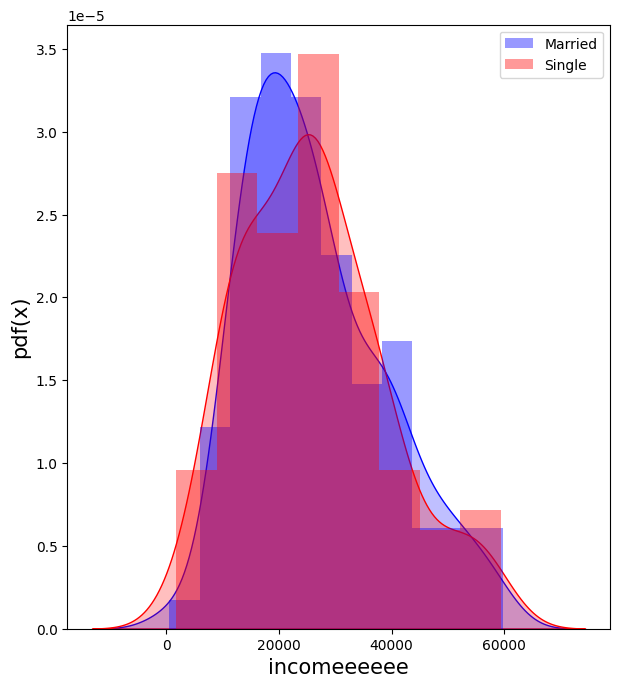

In [22]:
#Write your answer here
plt.subplots(figsize=(7, 8), dpi=100)
ax = sns.distplot(df_married["income"], color="blue", label="Married", hist=True, kde_kws={"shade": True})
ax = sns.distplot(df_single["income"], color="red", label="Single", hist=True, kde_kws={"shade": True})
plt.title = "Yorkshire Citizens' Annual Incomes by Marital Status"
ax.set_xlabel('incomeeeeee', fontsize=15)
ax.set_ylabel('pdf(x)', fontsize=15, rotation=90)
plt.legend()

**TA12) The Council is also interested in assessing whether there is any statistically significant difference in income 
depending on the region citizens live. They want to give equal opportunities to all Yorkies irrespective of where they live.**

**(i) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on location**

In [23]:
#### Write your answer here
# H₀: 𝑋𝑖𝑛𝑛𝑒𝑟 = 𝑋𝑡𝑜𝑤𝑛 = 𝑋𝑠𝑢𝑏 = 𝑋𝑟𝑢𝑟𝑎𝑙
# H₁: ∃𝑖, 𝑗 ∈ {𝑖𝑛𝑛𝑒𝑟,𝑡𝑜𝑤𝑛,𝑠𝑢𝑏,𝑟𝑢𝑟𝑎𝑙} where (𝑖 ≠ 𝑗) ∧ (𝑋𝑖 ≠ 𝑋𝑗)  # at least one is significantly different to the others
# where 𝑋 implies the sample mean for the respective subscripted area of the city


**(ii) Calculate the degrees of freedom**

In [24]:
#Write your answer here
df_inner = dataframe[dataframe["region"] == "INNER_CITY"]["income"]
df_town = dataframe[dataframe["region"] == "TOWN"]["income"]
df_rural = dataframe[dataframe["region"] == "RURAL"]["income"]
df_suburban = dataframe[dataframe["region"] == "SUBURBAN"]["income"]

locations = [df_inner, df_town, df_rural, df_suburban]

df_between = len(locations) - 1  # degrees of freedom
df_within = nt - len(locations)  # degrees of freedom

NameError: name 'nt' is not defined

**(iii) Find the critical value for a test with significance level α=0.05**

Hint: What type of test do we need to do in this scenario?


In [ ]:
alpha = 0.05
f_critical_value = stats.f.ppf(alpha, df_between, df_within)

**(iv) Perform the appropriate test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [25]:
# a one way ANOVA test is the most applicable test for this problem
# large f value implies significant differences between groups, small f value implies little differences between groups

# ANALYTICALLY
# useful link: https://www.youtube.com/watch?v=ZQEmSzrmBJc - very step by step and easy to follow, such that arithmetic error chances reduced, yuppies yup, alhamdulillah
# formulas:
# f = (variance_due_to_group_differences) / (variance_due_to_random_chance)  # variance_due_to_random_chance_among_individuals_within_single_groups
# = (variance_between_groups) / (variance_within_groups)
# = MSbetween / MSwithin
# = mean_of_sum_of_squares_between_groups / mean_of_sum_of_squares_within_groups
# MSbetween = SSbetween / dfbetween
# MSwithin = SSwithin / dfwithin
# dfbetween = degrees_of_freedom_between = k - 1 = number_of_groups - 1
# dfwithin = degrees_of_freedom_within = nt - k = number_of_participants_across_all_groups - number_of_groups
# SSbetween = ∑((∑x)^2 / n) - ((∑∑x)^2/nt)
# SSwithin = ∑∑(x^2) - ∑((∑x)^2/n)

# lists that shall contain the different groups': sample size, sum of means, sample means, 
n = []
sigma_x = []  # ∑x
x_bar = []  # x̄
sigma_x_power2_div_n = []  # (∑x)² / n
sigma_xpower2_ = []  # ∑(x²)

# locations = [df_inner, df_town, df_rural, df_suburban]

# len(locations[0]) == len(df_inner)  # yas it works, hum
# locations[0] == df_inner

# within groups calculations
for location in locations:
    n.append(location.size)
    sigma_x.append(sum(location))
    x_bar.append(np.mean(location))
    sigma_x_power2_div_n.append(np.power(sum(location), 2) / len(location))
    sigma_xpower2_.append(sum([np.power(j, 2) for j in location]))
    
# between groups calculations
nt = sum(n)  # n total sample size
sigma_sigma_x = sum(sigma_x)  # ∑∑x
sigma_sigma_x_2_div_nt = np.power(sigma_sigma_x, 2) / nt  # (∑∑x)^2/nt
sigma_sigma_x_power2_div_n_ = sum(sigma_x_power2_div_n)  # ∑((∑x)^2 / n)
sigma_sigma_xpower2__ = sum(sigma_xpower2_)  # ∑∑(x^2)

# working way backwards
# df_between = len(locations) - 1  # degrees of freedom
# df_within = nt - len(locations)  # degrees of freedom

SSbetween = sigma_sigma_x_power2_div_n_ - sigma_sigma_x_2_div_nt
SSwithin = sigma_sigma_xpower2__ - sigma_sigma_x_power2_div_n_

MSbetween = SSbetween / df_between
MSwithin = SSwithin / df_within

f_value_via_formulas = MSbetween / MSwithin

# PROGRAMATTICALLY
f_value_via_library = stats.f_oneway(df_inner, df_town, df_rural, df_suburban)

if round(f_value_via_formulas, 6) == round(f_value_via_library[0], 6):  # I mean they don't have to be exact all the way down like pi, just enough same digits to a certain significant value greater than 5 I'd say
        if f_value_via_library[1] > alpha:  # round(f_value_via_formulas, 6) < f_critical_value:  # this doesn't really get taken into account
            print("insufficent evidence to suggest H₀ should be rejected, due to p value being greater than significance level")
# The F value in the ANOVA test also determines the P value; The P value is the probability of getting a result
# at least as extreme as the one that was actually observed, given that the null hypothesis is true.
# Reject the null when your p value is smaller than your alpha level 0.05. You should not reject the null if your
# critical f value is smaller than your F Value, unless you also have a small p-value.
# source: https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/


NameError: name 'df_within' is not defined

**(v) Plot a boxplot showing the income per region**

<AxesSubplot:>

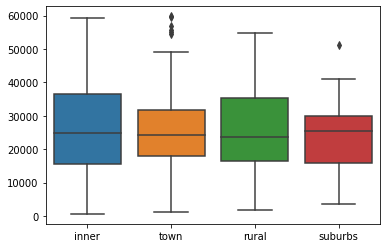

In [26]:
#Write your answer here
regions = pd.DataFrame(data={"inner": df_inner, "town": df_town, "rural": df_rural, "suburbs": df_suburban})
plt.subplots()
sns.boxplot(data=regions)

**TA13) The Council is also interested in assessing whether there is any statistically significant difference in income depending on the age of citizens. The Council considers the following age groups [17-29], [30,41], [42,53], [54,67)** 

**(i) State the Null and Alternative hypotheses that will enable the Council to check whether there is any discrimination in income depending on these age groups**

In [27]:
# Ho: X1 = X2 = X3 = X4  # where Xn is the sample mean of a group n
# Ha: ∃i, j ∈ {1, 2, 3, 4} ∙ (i ≠ j) ∧ (Xi ≠ Xj)
dataframe.head()

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO


**(ii) Calculate the degrees of freedom**

In [28]:
#Write your answer here

df_17_to_29 = dataframe[dataframe["age"] < 30]["income"]
df_30_to_41 = dataframe[(dataframe["age"] >= 30) & (dataframe["age"] < 42)]["income"]
df_42_to_53 = dataframe[(dataframe["age"] >= 42) & (dataframe["age"] < 54)]["income"]
df_54_to_67 = dataframe[dataframe["age"] >= 54]["income"]

age_groups = [df_17_to_29, df_30_to_41, df_42_to_53, df_54_to_67]

d_of_f_between = len(age_groups) - 1  # degrees of freedom
d_of_f_within = sum([len(i) for i in age_groups]) - len(age_groups)  # degrees of freedom

**(iv) Perform the appropriate test to evaluate the hypotheses for significance level 𝛼=0.05. You may use the appropriate scipy.stats method.**

In [29]:
#Write your answer here

alpha = 0.05

f = stats.f_oneway(df_17_to_29, df_30_to_41, df_42_to_53, df_54_to_67)

# The F value should always be used along with the p value in deciding whether your results are significant
# enough to reject the null hypothesis. If you get a large f value (one that is bigger than the F critical
# value found in a table), it means something is significant, while a small p value means all your results
# are significant. The F statistic just compares the joint effect of all the variables together. To put it
# simply, reject the null hypothesis only if your alpha level is larger than your p value.

if alpha > f[1]:
    print("reject null hypothesis")
else:
    print("continue accepting null hypothesis")

reject null hypothesis


**(v) Plot the distributions for the four age groups**

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

TypeError: 'str' object is not callable

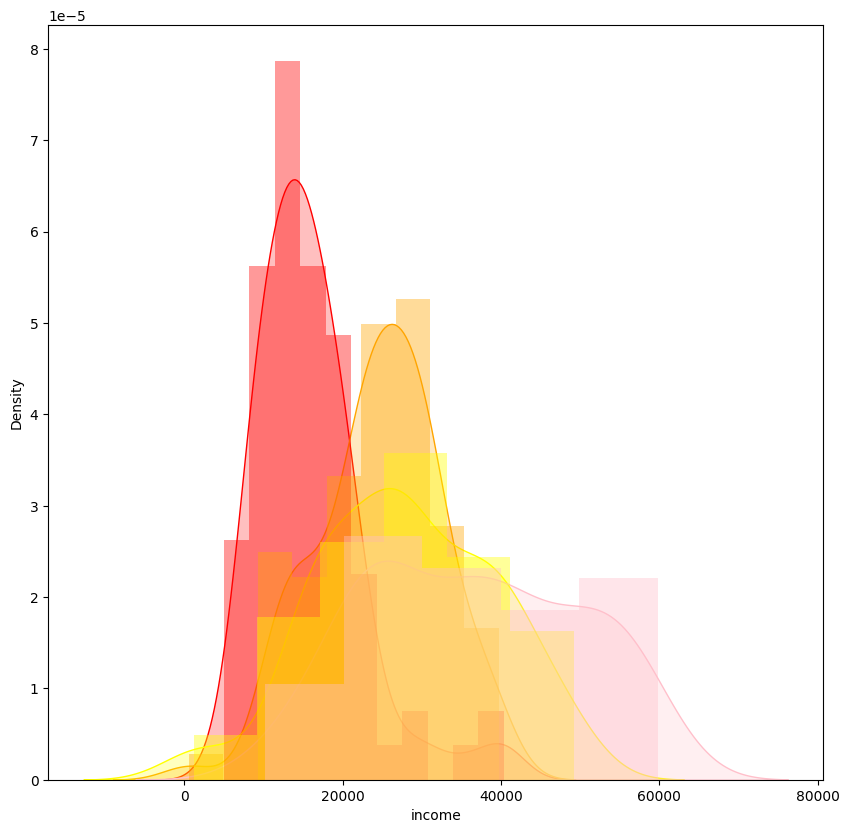

In [30]:
#Write your answer here
plt.subplots(figsize=(10, 10), dpi=100)
ax = sns.distplot(df_17_to_29, color="red", label="0 to 29", hist=True, kde_kws={"shade": True})
ax = sns.distplot(df_30_to_41, color="orange", label="30 to 41", hist=True, kde_kws={"shade": True})
ax = sns.distplot(df_42_to_53, color="yellow", label="42 to 53", hist=True, kde_kws={"shade": True})
ax = sns.distplot(df_54_to_67, color="pink", label="54 to 67", hist=True, kde_kws={"shade": True})

plt.title('Yorkie Citizenry Incomes By Ages')
ax.set_xlabel('Income', fontsize=15)
ax.set_ylabel('pdf(x)', fontsize=15, rotation=90)
plt.legend()

**(vi) Perform a post hoc analysis using the Bonferroni correction to identify the pairs {of groups} which exhibit statistically significant difference**

In [ ]:
# useful link: https://www.youtube.com/watch?v=rMuNniCTsOw
# most researchers test a null hypothesis with alpha (at most) at 0.05 ~ that is most researchers accept a maximum
# type I error rate of 5% for any particular analysis
# type one error: erroneously rejecting null hypothesis in a statisical analysis on a sample of the population,
# when in fact the the null hypothesis is true for that population
# the bonferroni correction is an adjustment applied to p values that is 'supposed to be applied' when two or more
# statistical analyses have been performed on the same sample of data {it is deliberated}
# familywise error rate is known to be larger than the per analysis error rate
# the more statistical analyses are carried out, the greater the familywise error rate
# αvFW = 1 - (1 - αvPC)^c  # where c is the number of comparisons performed and αvFW is the specified per contrast
# errror rate (i.e. alpha, usually set to 0.05)
# in order to compensate for this increased family wise error rate, the approach of the Bonferroni correction is used
# this is done by dividing the per analysis alpha rate by the number of statistical analyses performed (alpha)
# any observed p values (obtained from the statistical analyses) less than the corrected α  (i.e p) value is decalred to be
# staistically significant
# but all too often when you do the correction, you end up with little to no statistically significant results that
# you can talk about
# (alternatively could test by muliplying observed p values with number of statisitcal analyses performed {reduced
# to 0.999 if multiplications result in probabilities greater than 1}, and any corrected/muliplied p values less than 
# adjusted alpha (i.e corrected p) are declared to be statistically significant - exactly the same result cuz same
# process but reserved, this process is more used in statistical programs)

# alternative source: https://www.statisticssolutions.com/bonferroni-correction/
# Bonferroni correction is a conservative test that, although protects from Type I Error, is vulnerable to Type II errors
# (failing to reject the null hypothesis when you should in fact reject the null hypothesis)
# To get the Bonferroni corrected/adjusted p value, divide the original α-value by the number of analyses on the dependent variable
# αcritical= 1 – (1 – αaltered)^k, where k = the number of comparisons on the same dependent variable


In [ ]:
# so carrying out multiple t-tests as opposed to the ANOVA we used earlier {better to use ANOVA though, cuz repeating
# statistical tests not good practice}

# age_groups = [df_17_to_29, df_30_to_41, df_42_to_53, df_54_to_67]
t_test_group_1_and_group_2 = stats.ttest_ind(df_17_to_29, df_30_to_41)
t_test_group_1_and_group_3 = stats.ttest_ind(df_17_to_29, df_42_to_53)
t_test_group_1_and_group_4 = stats.ttest_ind(df_17_to_29, df_54_to_67)
t_test_group_2_and_group_3 = stats.ttest_ind(df_30_to_41, df_42_to_53)
t_test_group_2_and_group_4 = stats.ttest_ind(df_30_to_41, df_54_to_67)
t_test_group_3_and_group_4 = stats.ttest_ind(df_42_to_53, df_54_to_67)

alpha = 0.05
number_of_tests = 6
bonferronily_corrected_alpha = alpha / number_of_tests

if t_test_group_1_and_group_2[1] < bonferronily_corrected_alpha:
    print("the difference between group 1 and group 2 is statistically significant")
else:
    print("the difference between group 1 and group 2 is not statistically significant")
if t_test_group_1_and_group_3[1] < bonferronily_corrected_alpha:
    print("the difference between group 1 and group 3 is statistically significant")
else:
    print("the difference between group 1 and group 3 is not statistically significant")
if t_test_group_1_and_group_4[1] < bonferronily_corrected_alpha:
    print("the difference between group 1 and group 4 is statistically significant")
else:
    print("the difference between group 1 and group 4 is not statistically significant")
if t_test_group_2_and_group_3[1] < bonferronily_corrected_alpha:
    print("the difference between group 2 and group 3 is statistically significant")
else:
    print("the difference between group 2 and group 3 is not statistically significant")
if t_test_group_2_and_group_4[1] < bonferronily_corrected_alpha:
    print("the difference between group 2 and group 4 is statistically significant")
else:
    print("the difference between group 2 and group 4 is not statistically significant")
if t_test_group_3_and_group_4[1] < bonferronily_corrected_alpha:
    print("the difference between group 3 and group 4 is statistically significant")
else:
    print("the difference between group 3 and group 4 is not statistically significant")

# conclusion: ageism perhaps may be involved in Yorshire citizens' incomes, except between those who lie in the 
# categorical age ranges of '30 to 41' and '42 to 53'

**(vii) Plot a boxplot showing the income per age group**

Income (y axis) By Ages (x axis)
________________________________


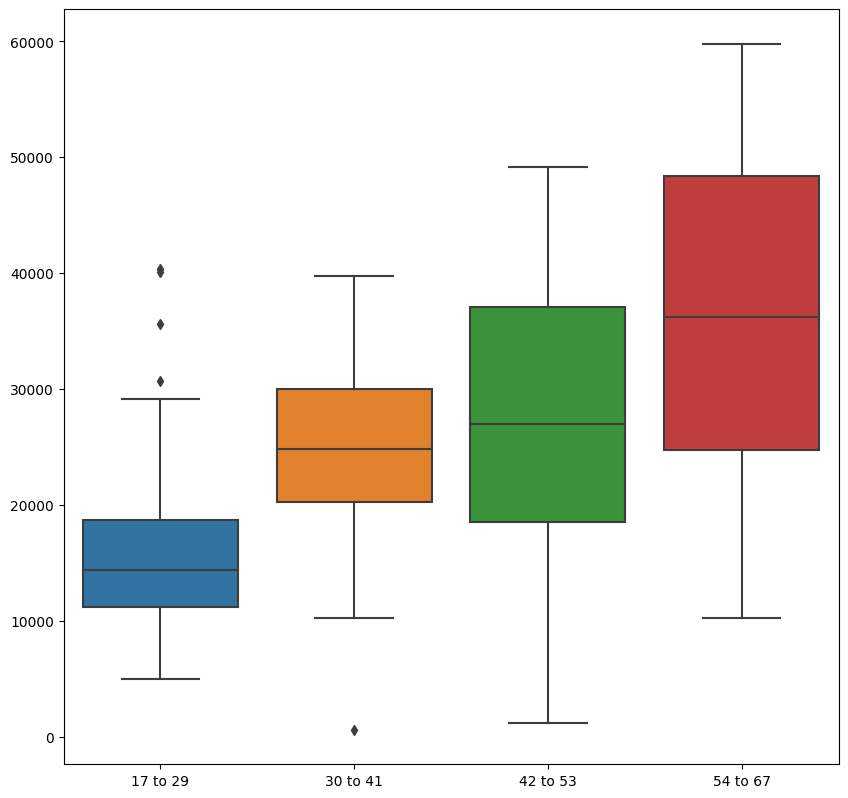

In [31]:
#Write your answer here
ages = pd.DataFrame(data={"17 to 29": df_17_to_29, "30 to 41": df_30_to_41, "42 to 53": df_42_to_53, "54 to 67": df_54_to_67})
ax = plt.subplots(figsize=(10, 10), dpi=100)
ax = sns.boxplot(data=ages)  # x="ages", y="income" # for some reason sns not accepting these label parameters
print("Income (y axis) By Ages (x axis)")
print("________________________________")

**TA14) Implement the Pearson colleration metric to investigate whether there is any correlation between 'Age' (no groups) and 'Income'. Once you finish the implementation you can check their correctness using the built-in functions of Scipy.stats**

What is your interpretation for the correlation between "Age" and "Income"?

* Tip: See https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html


In [32]:
# correlation is not always causation
# r formula:
# r =  ∑((x - x̄) * (y - y̅)) / √(∑(x - x̄)^2 * ∑(y - y̅)^2) = ∑(a) / √(∑b * ∑c)
x_bar = np.mean(dataframe["age"])
y_bar = np.mean(dataframe["income"])

a = []
b = []
c = []

for i in range(0, dataframe.shape[0]):  # note: dataframe.size does not give number of records
    c_i = (dataframe["income"][i] - y_bar)  # (y - y̅)
    b_i = (dataframe["age"][i] - x_bar)  # (x - x̄)
    a_i = b_i * c_i  # (x - x̄) * (y - y̅)
    a.append(a_i)
    b.append(np.power(b_i, 2))  # (x - x̄)^2
    c.append(np.power(c_i, 2))  # (y - y̅)^2

pearson_r_via_form = sum(a) / np.sqrt(sum(b) * sum(c))
# or sum(a) could have alternatively been calculated through:
# np.sum( (dataframe["age"] - np.mean(dataframe["age"])) * (dataframe["income"] - np.mean(dataframe["income"])) )
# different ways of doing the same stats:
# r = (sum(a) / (df.shape[0] - 1)) / (np.std(df["age"], ddof=1) * np.std(df["income"], ddof=1))

pearson_via_lib = stats.pearsonr(dataframe["age"], dataframe["income"])
pearson_r_via_lib = pearson_via_lib[0]
pearson_p_via_lib = pearson_via_lib[1]
round(pearson_r_via_form, 13) == round(pearson_r_via_lib, 13)  # yaaaaaaaas alhamdulillah X')

True

**TA15) Create a new column in the dataframe called "age group" that splits the ages into groups of size 15**

Hint: Look at the Pandas method cut(data, bins, labels)

In [33]:
#Write your answer here
df_with_age_groups = dataframe.copy()
# df["age group {fifteenthile}"] = pd.cut(x=df_with_age_groups["age"], bins=15, right=False)  # not 15 groups!
df_with_age_groups["age group {in fifteens}"] = pd.cut(x=df_with_age_groups["age"], bins=range(0, 81, 15), right=False)
# df_with_age_groups[df_with_age_groups["age group {in fifteens}"].str.contains("[75,")]  # was (unsuccesfully) trying to find oldest group - if any bigger
# df_with_age_groups["age group {in fifteens}"]  # thankfully, this lets us know the categories! AH!
# so the right=False makes it so that any catogeries  [75, infintity] is unincluded because it breaks the rule of all the categories only having members with ages in a 15 age interval only
# no wait idk I'm prolly wrong T>T
# df_with_age_groups["age group {in fifteens}"][0]  # returns Interval(45, 60, closed='left')
df_with_age_groups["age group {in fifteens}"]

0      [45, 60)
1      [30, 45)
2      [45, 60)
3      [15, 30)
4      [45, 60)
         ...   
325    [15, 30)
326    [30, 45)
327    [15, 30)
328    [45, 60)
329    [15, 30)
Name: age group {in fifteens}, Length: 330, dtype: category
Categories (5, interval[int64]): [[0, 15) < [15, 30) < [30, 45) < [45, 60) < [60, 75)]

**TA16) Generate a contingency table to show how the age group (x axis) is related to the region (y axis)**

* Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

**Note**: A contingency table summarises data for two (or more) categorical variables

In [34]:
# categorical variables: age group, region
contingency_table = pd.crosstab(index=df_with_age_groups["age group {in fifteens}"], columns=df_with_age_groups["region"], margins=all)
type(contingency_table)

pandas.core.frame.DataFrame

**TA17) What would be the hypotheses if the Council wants to assess whether the age group and region variables are independent? Report these hypotheses**

In [35]:
# Ho: age group and region are independent  # equal frequencies
# Ha: age group and region are not independent  # unequal frequencies

**TA18) Implement the Chi Square to investigate whether there is any dependency between correlation between region and age group. Once you finish the implementation you can check their correctness using the built-in functions of Scipy.stats**

* Hint: You may need to use the data from TA16

* Hint: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [75]:
# carrying out the chi square test of independence

# analytically  # too difficult tbf T.T cri
# chi square distribution is asymettric, a skewed distribution
# area of the critical region is equal to alpha, and the critical region is defined by the critical chi square value(s) - found from the from chi square critical values table
# if the observed value lies in the critical region, sufficent enough evidence to reject Ho

# calculating the expected value of the two nominal variables
# Ei, j = (sum_of_the_ith_column * sum_of_the_kth_row) / total_number
total_number = contingency_table["All"].max()
expected_values_contingency_table = contingency_table.copy()  # deep=True is default parameter value
region_alls = expected_values_contingency_table["All"]
age_group_alls = expected_values_contingency_table.loc["All"]
age_groups_array, regions_array = expected_values_contingency_table.axes

# valid_test = True  # validity can only be established at the end, if number of lessthan5s is less than 20%
less_than_5 = 0
iteration = 0
i = 0
while i < (len(age_groups_array) - 1):
    j = 0
    while j < (len(regions_array) - 1):
        expected_value = (age_group_alls[i] * region_alls[j]) / total_number
        expected_values_contingency_table.at[age_groups_array[i], regions_array[j]] = expected_value
        if expected_value < 5:
            less_than_5 += 1
        j += 1
        iteration += 1
    i += 1
percentage_of_less_than_5 = less_than_5 / iteration
if percentage_of_less_than_5 > 0.2:
    print("cannot proceed with chi squared test")
    valid_test = False

# for i in range(len(age_groups_array) - 1):
#     for j in range(len(regions_array) - 1):
#         expected_value = (age_group_alls[i] * region_alls[j]) / total_number
#         expected_values_contingency_table.at[age_groups_array[i], regions_array[j]] = expected_value

#         if expected_value > 5:
#             print("cannot proceed with chi squared test due to value less than 5:", expected_value)
#             break  # baaad practice
            
# alhamdulillah - finally - after a day agonising intermittently X'S only with the help of Allah, yup, hum

# calculating the value of the chi square test of independence
# x^2 = summing summing (observed value of two nominal variables - expected value of two nominal variables)^2 / expected value of two nominal variables)
summing = []
for i in range(len(age_groups_array) - 1):
    for j in range(len(regions_array) - 1):
        observed = contingency_table.at[age_groups_array[i], regions_array[j]]
        expected = expected_values_contingency_table.at[age_groups_array[i], regions_array[j]]
        appending = np.power((observed - expected), 2) / expected
        summing.append(appending)
print(sum(summing))
# idk give up after daysss, dunno how to get to 17.451443551632916... Y.Y

# changed_values_contingency_table = pd.DataFrame(np.where(isinstance(contingency_table, int), contingency_table, contingency_table*2), 
#                   index=contingency_table.index, 
#                   columns=contingency_table.columns)  # actually this ends up changing all the values in the table according to the boolean you set out ~ cool, but not our aim rn
# later on in midst of things, was tempted to do matrix multiplication, but I'm not well versed enough in it tbf T.T

564.5539529280385


In [37]:
# programmatically
chi_square_stat, p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(contingency_table)

chi_square_stat, p_value, degrees_of_freedom

(17.451443551632916, 0.35698153776001246, 16)

**TA19) Calculate the degrees of freedom for TA16/18**

In [38]:
#Write your answer here

# hmmm differernt d of f to the function in stats

# degrees_of_freedom = (r - 1)(c - 1)  # where r = number of rows (catogeries), c = number of columns (categories)
d_of_f = ((len(age_groups_array) - 1 ) - 1) * ((len(regions_array) - 1) - 1)  # minusing an extra cuzza the extra "All" row and column
d_of_f

9

**TA20) Using a significance level 𝛼=0.05, find the critical value for the hypothesis from TA17 and determine whether the Null hypothesis holds or not**

In [39]:
# critical value is 16.919, from chi squared table
# as calclualted p = 17.451443551632916 is greater than critical value, and so lies inside the critical region
# thus Ho is rejected {only narrowly tho XOS}

region,INNER_CITY,RURAL,SUBURBAN,TOWN,All
age group {in fifteens},,,,,
"[15, 30)",48,13,4,18,83
"[30, 45)",44,10,7,41,102
"[45, 60)",36,20,10,24,90
"[60, 75)",27,11,4,13,55
All,155,54,25,96,330


**TA21) Plot a scatter plot for the ages VS income**

Text(0, 0.5, 'Income(£)')

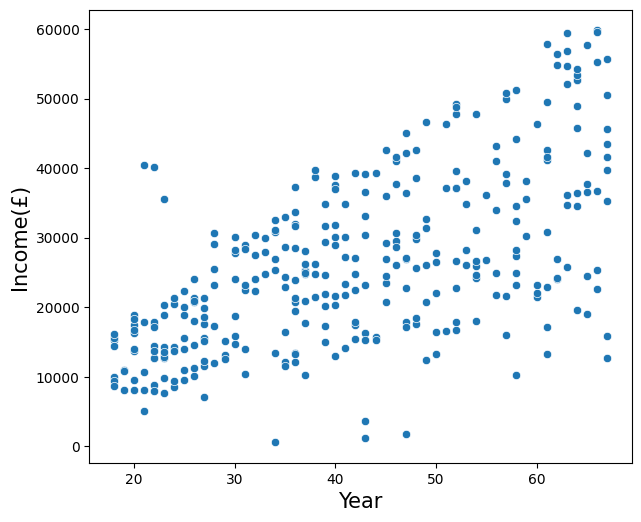

In [50]:
#Write your answer here
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=dataframe, marker='o')
ax.set_xlabel('Year', fontsize=15) # set x label
ax.set_ylabel('Income(£)', fontsize=15,rotation=90) # set y label


**TA22) Train a linear regression model to determine the "best line of fit" for this data using only the Year as the input variable**

* Hint: You might want to use the following library
  
  from sklearn import linear_model
  
 * Hint: You might want to check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [52]:

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(dataframe["age"].to_numpy().reshape(-1, 1), dataframe["income"])

LinearRegression()

**TA23) Extract and report the coefficients (regression coefficient and intercept) of the trained linear regression model**

 * Hint: You might want to check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [72]:
# programatical calculations
print("beta:", reg.coef_[0])  # array of shape... containing estimated coefficients for the linear regression problem
print("alpha:", reg.intercept_)  # independent term in the linear model (set to 0.0 if fit_intercept = False)
person_r_program = stats.pearsonr(dataframe["age"], dataframe["income"])[0]
print("pearson r:", person_r_program)

beta: 539.1150726420367
alpha: 3631.49023086526
pearson r: 0.6237592016595748


In [69]:
# analytical calculations
# beta  = pearsonr * std_of_Y / std_of_X
beta  = person_r_program * np.std(dataframe["income"], ddof=1)  / np.std(dataframe["age"], ddof=1)
# alpha = mean_of_Y - (beta * mean_of_X)
alpha = np.mean(dataframe["income"]) - ( beta * np.mean(dataframe["age"]) )

In [73]:
pearson_r_calculated = beta * np.std(dataframe["age"], ddof=1) / np.std(dataframe["income"], ddof=1)
pearson_r_calculated
# loops

0.6237592016595748

**TA24) Using your age, make a prediction about your income in 10 years time (i.e., your age in 2030). Also, report the complete linear regression model**


In [60]:
#Write your answer here
reg.predict([[19 + 10]])

array([19265.82733748])

**TA25) Plot the linear regression model alongside the scatter plot from TA21**

* Hint: invoke the plotting functions (one for the scatter plot, one for the linear regression model) one after the other

* Hint: To generate the linear regression model, you can use (i) high school maths or (ii) the predict() method of the LinearRegression library

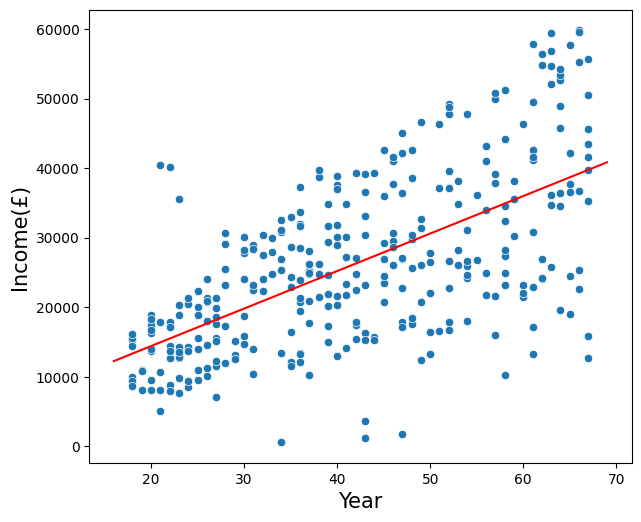

In [65]:
#Write your answer here
#Write your answer here
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=dataframe, marker='o')
ax.set_xlabel('Year', fontsize=15) # set x label
ax.set_ylabel('Income(£)', fontsize=15,rotation=90) # set y label
min_earning_age = 16
max_earning_age = 70
model = reg.predict(np.arange(min_earning_age, max_earning_age).reshape(-1, 1))
ax = sns.lineplot(y=model, x=np.arange(min_earning_age, max_earning_age), color="r")


## Should you finish earlier/want to practice at home, you could

* Go back to the previous practicals and run some statistical tests
    * Do some statistical analysis on the Titanic (e.g., is there a relationship between the people survived and gender?)
    * Do a linear regression on the Android Store (e.g., what might be the rating that a game of a specific nature might received)